In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

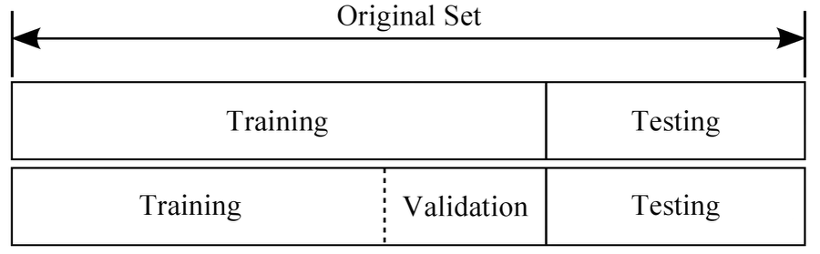

In [2]:
from IPython.display import Image
Image('./ml_source_files/train_validation_test.png')

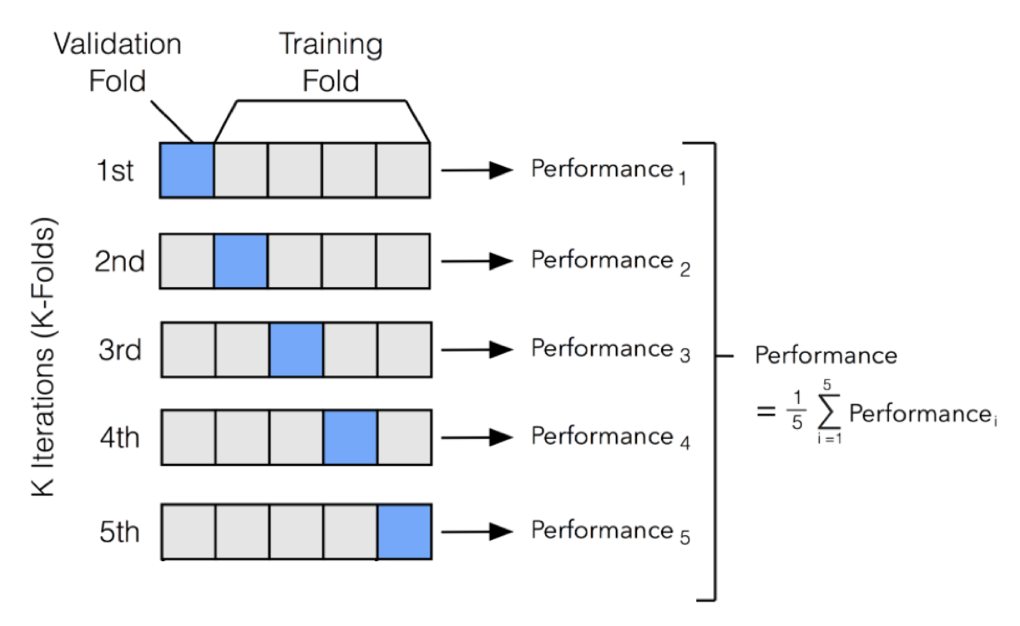

In [3]:
Image('./ml_source_files/cross_validation.png')

In [4]:
### cross_validation

# * 일반화 성능 측정 방법
# * 일반화 수준을 파악할 수 있지만, 비용(시간, 메모리)이 많이 든다

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

In [17]:
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
accuracy_score(y_test, preds)  
# knn.score(x_test, y_test)  # accuracy

0.9300699300699301

In [18]:
knn.score(x_test, y_test)

0.9300699300699301

In [20]:
scores = cross_val_score(knn, x_train, y_train, cv=5)
scores

array([0.90697674, 0.94117647, 0.91764706, 0.94117647, 0.92941176])

In [23]:
print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.90697674 0.94117647 0.91764706 0.94117647 0.92941176]
교차검증평균 : 0.9272777017783858
교차검증편차 : 0.01338494629296428


In [24]:
scores = cross_val_score(knn, x_train, y_train, cv=3)
print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.93661972 0.91549296 0.93661972]
교차검증평균 : 0.9295774647887324
교차검증편차 : 0.009959250439247135


In [25]:
# 분할기 클래스 객체를 사용 : 보다 정교한 cross validation

In [26]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
scores = cross_val_score(knn, x_train, y_train, cv = kfold)

print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.90697674 0.94117647 0.92941176 0.94117647 0.92941176]
교차검증평균 : 0.9296306429548565
교차검증편차 : 0.012489253110435606


In [28]:
# shuffle cross validation
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(knn, x_train, y_train, cv = kfold)

print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.94186047 0.91764706 0.94117647 0.92941176 0.94117647]
교차검증평균 : 0.9342544459644323
교차검증편차 : 0.00951774391905002


In [29]:
# shuffle cross validation
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(knn, x_train, y_train, cv = kfold, scoring='f1_macro')

print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.89912023 0.9351046  0.9351046  0.915      0.91649123]
교차검증평균 : 0.9201641309834743
교차검증편차 : 0.013634067892851535


In [30]:
# shuffle cross validation
kfold = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(knn, x_train, y_train, cv = kfold, scoring='precision_macro')

print('교차검증점수 :',scores)
print('교차검증평균 :',np.mean(scores))
print('교차검증편차 :',np.std(scores))

교차검증점수 : [0.9053745  0.91256158 0.9553455  0.92772109 0.94705514]
교차검증평균 : 0.9296115608608918
교차검증편차 : 0.01922615454500714
